### Usage example: Dynamic functional connectivity

Dynamic functional connectivity can be estimated though the `connectivity` module. We start by getting some data from the ABIDE data set:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from nilearn import datasets

# Preprocessed time series data from the ABIDE dataset
subject = 50010
data = datasets.fetch_abide_pcp(SUB_ID=subject, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160", legacy_format=False)
ts = data.rois_dosenbach160[0]

[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp


We can then estimate dynamic functional connectivity with any of the included methods, e.g. with the spatial distance method, or a phase synchronization method:

Calculating Spatial Distance, please wait...
Calculating Phase Synchronization, please wait...


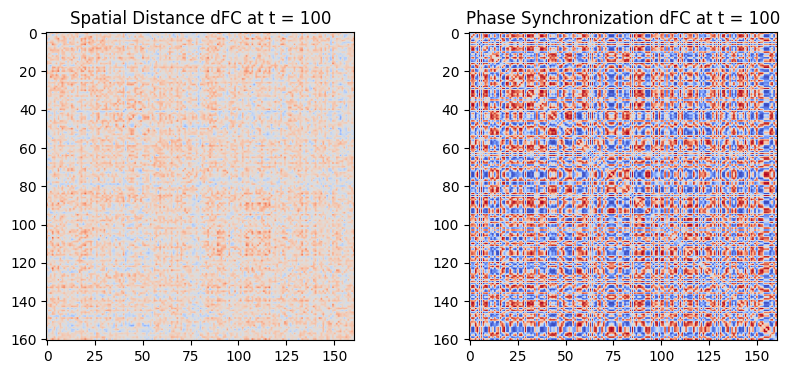

In [12]:
from comet import connectivity

sd = connectivity.SpatialDistance(ts, dist="euclidean")
dfc_sd = sd.estimate()

ps = connectivity.PhaseSynchrony(ts, method="crp")
dfc_ps = ps.estimate()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(dfc_sd[:,:,100], cmap="coolwarm", vmin=-1, vmax=1)
ax[0].set_title("Spatial Distance dFC at t = 100")
ax[1].imshow(dfc_ps[:,:,100], cmap="coolwarm", vmin=-1, vmax=1)
ax[1].set_title("Phase Synchronization dFC at t = 100");

Methods which rely on windowing techniques also contain a centers() method, which returns the corresponding BOLD time series indices of the dFC data: 

In [13]:
# Tapered sliding window
tsw = connectivity.SlidingWindow(ts, windowsize=45, stepsize=10, shape="gaussian", std=7)
dfc_tsw = tsw.estimate()
centers_tsw = tsw.centers()

print("Number of BOLD time points:", ts.shape[0])
print("Number of dFC estimates:", dfc_tsw.shape[2])
print("Centers of the sliding window (in BOLD time points):", centers_tsw)

Calculating Sliding Window Correlation, please wait...
Number of BOLD time points: 196
Number of dFC estimates: 16
Centers of the sliding window (in BOLD time points): [ 22  32  42  52  62  72  82  92 102 112 122 132 142 152 162 172]
